# Homework 3: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/README.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (4 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [30]:
# INSERT CODE HERE
library(ggplot2)
library(tidyverse)
library(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

In [ ]:
# INSERT CODE HERE
ggplot(gapminder, aes(x=year, y=lifeExp)) + 
  geom_point(size=0.5) + scale_x_continuous(name = "Year" ) +
  scale_y_continuous(name = "Life Expectancy")

We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so. 

What trends can you identify in the data? 

In [ ]:
# INSERT CODE HERE
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent)) + 
  geom_point(size=0.5) + scale_x_continuous(name = "Year" ) +
  scale_y_continuous(name = "Life Expectancy")

> *Write your response here.*
> 

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot. 

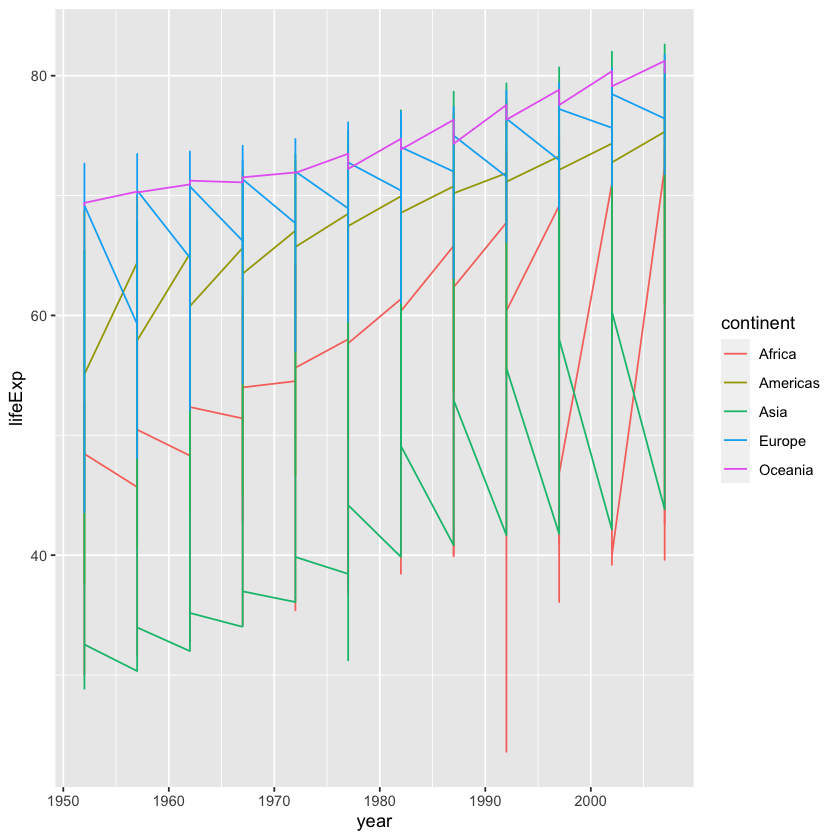

In [12]:
# INSERT CODE HERE
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent)) +
  geom_line()

Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> *Write your response here.*
> 

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

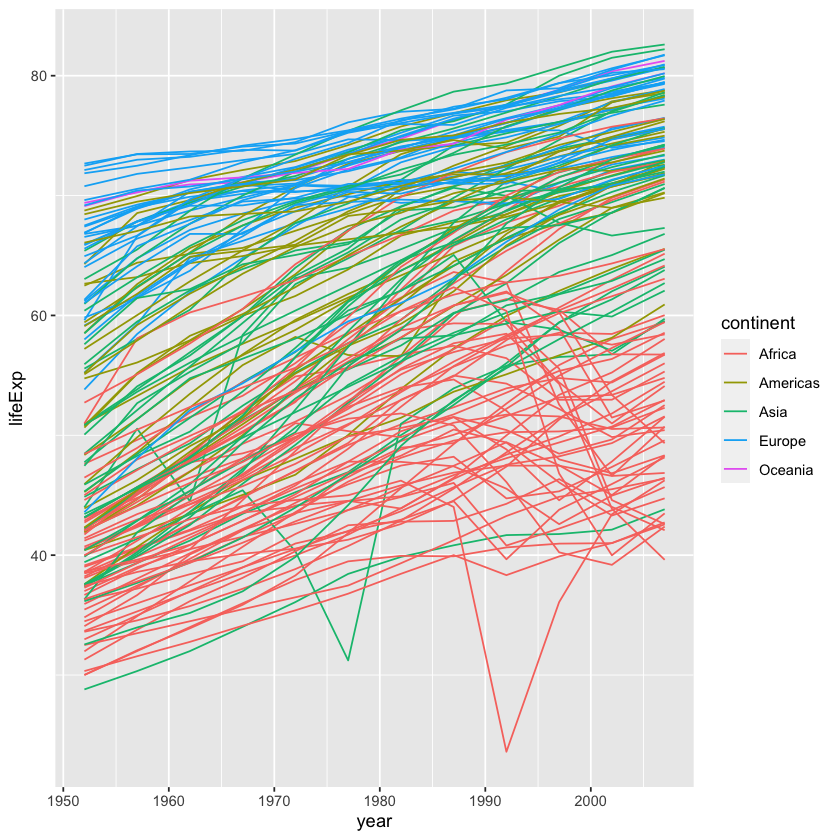

In [4]:
# INSERT CODE HERE
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent, group=country)) +
  geom_line()


But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer). 

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

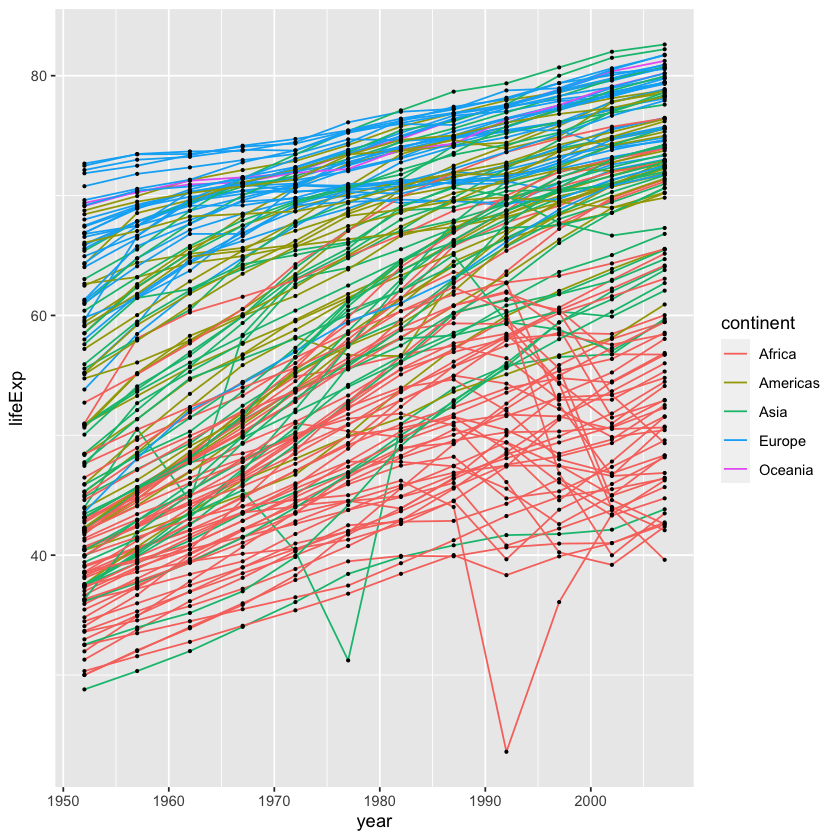

In [7]:
# INSERT CODE HERE

# method 1
ggplot(gapminder, aes(x=year, y=lifeExp, color=continent, group=country)) + 
  geom_line() +
geom_point(size=0.5, colour="black") 

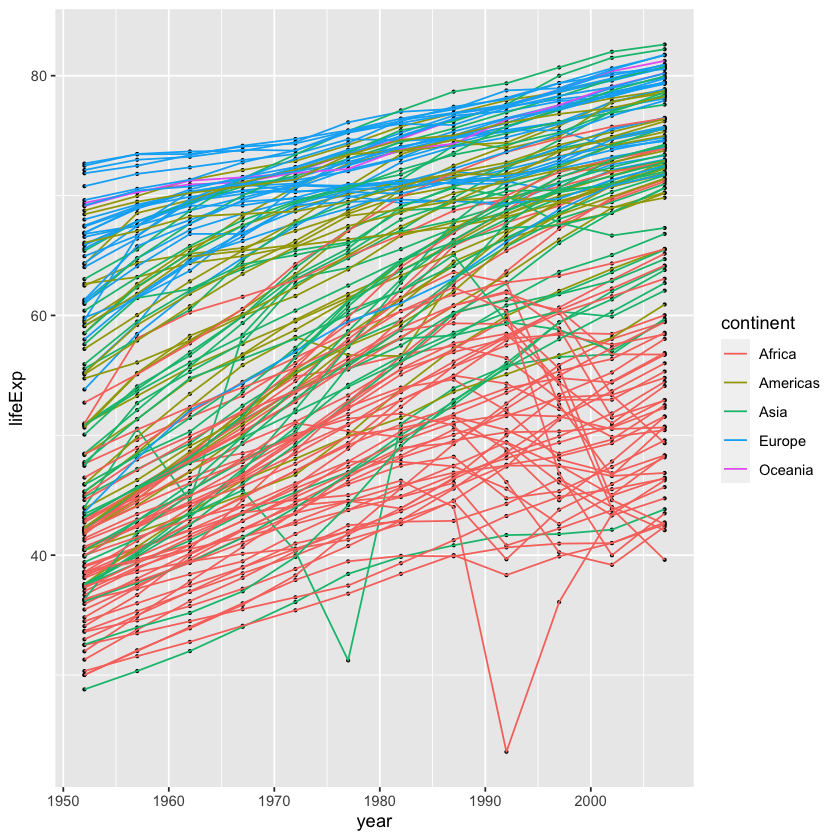

In [9]:
# INSERT CODE HERE

# method 2

ggplot(gapminder, aes(x=year, y=lifeExp, color=continent, group=country)) + 
  geom_point(size=0.5, colour="black") +
  geom_line() 


---
# 2. Adding statistics (3 points)

`ggplot2` allows easy overlay of statistical models on top of the data. 

The graph below shows the relationship between life expectency and GDP per capita:

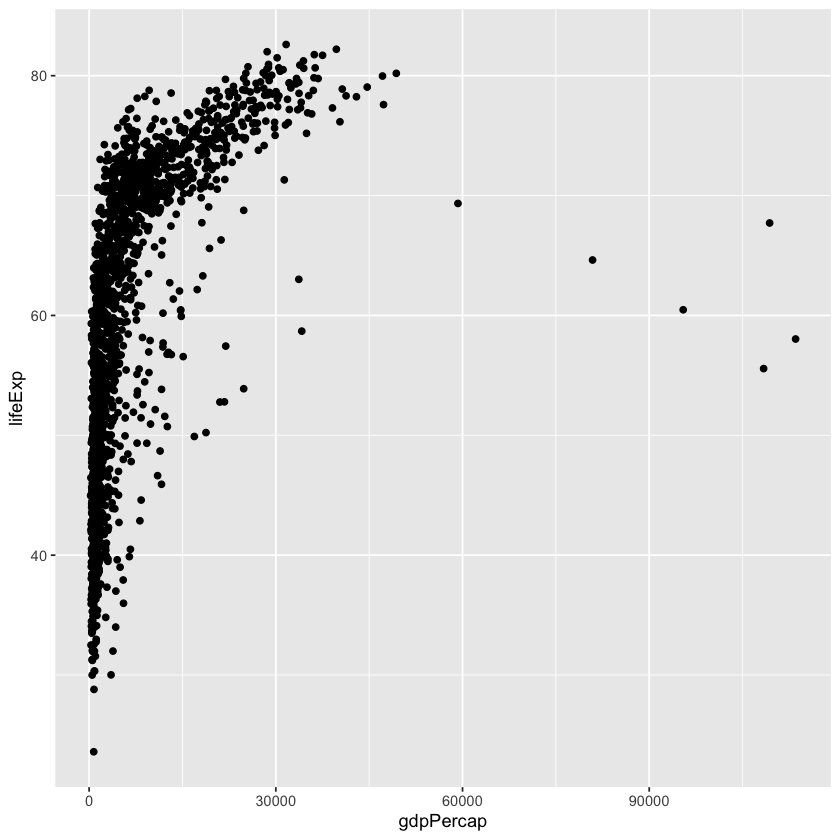

In [8]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

Warning message:
“Removed 14 rows containing missing values (geom_point).”


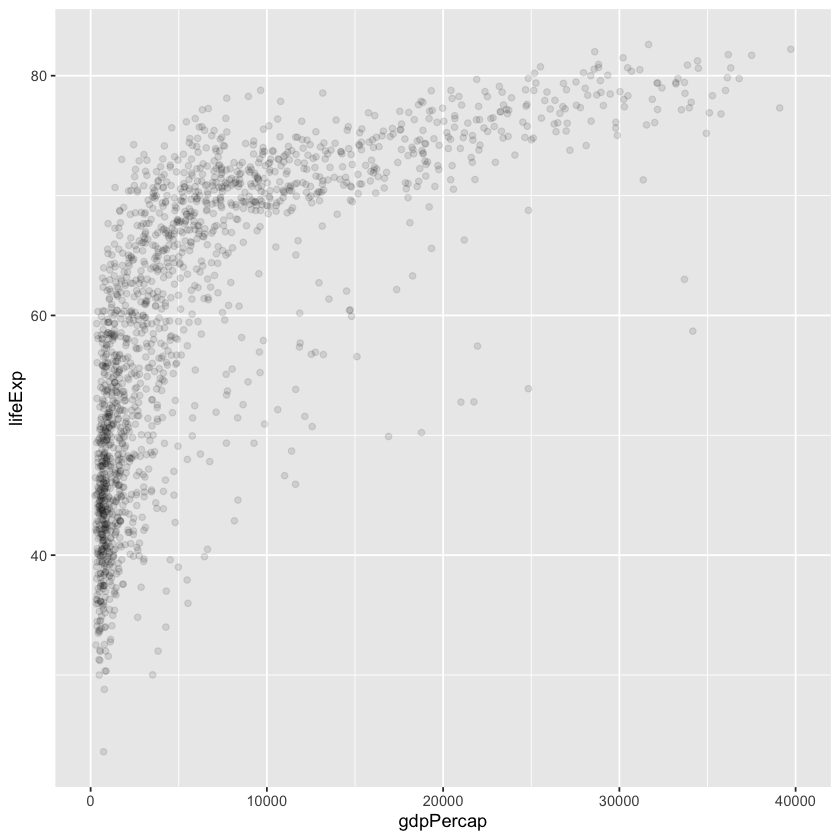

In [11]:
# INSERT CODE HERE

ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
geom_point(alpha=0.10) + xlim(0,40000)



Already we can more easily visualize the trend in the data. 

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”


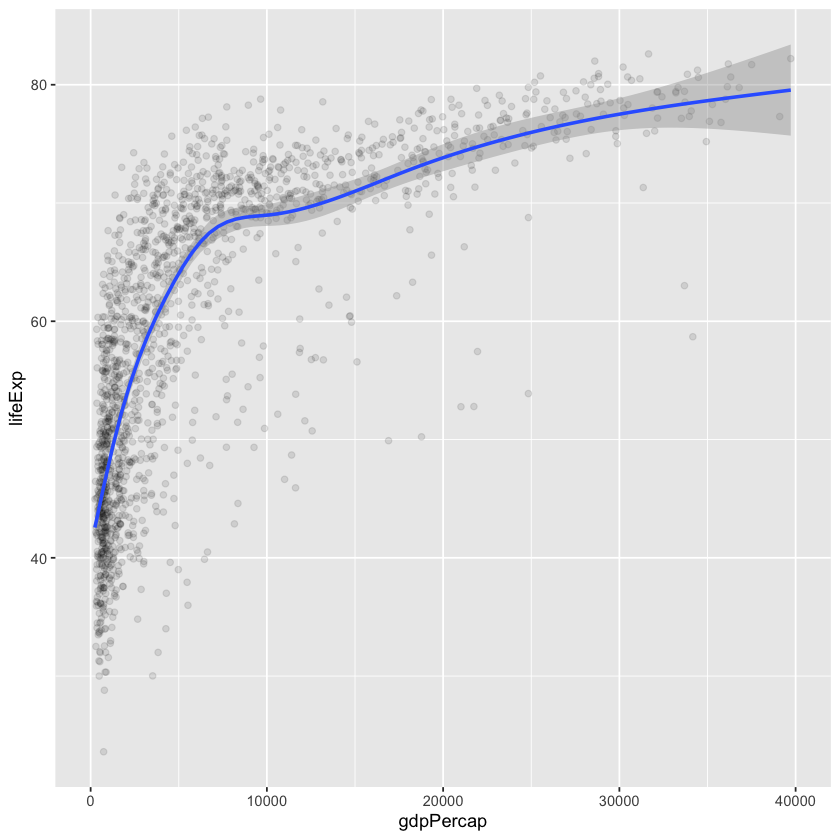

In [13]:
# INSERT CODE HERE

ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
geom_point(alpha=0.10) + xlim(0,40000)+ geom_smooth()



Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements. 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”


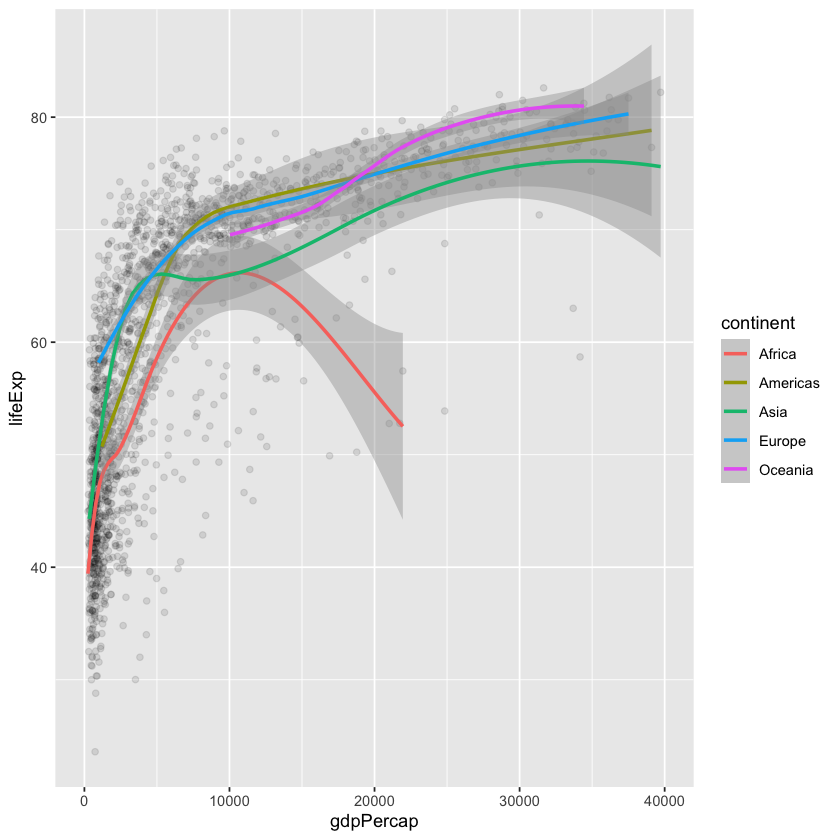

In [14]:
# INSERT CODE HERE

ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
geom_point(alpha=0.10) + xlim(0,40000)+ geom_smooth(aes(group=continent, color=continent))




---
# 3. Multipanel figures (3 points)

In question 1, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

First, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

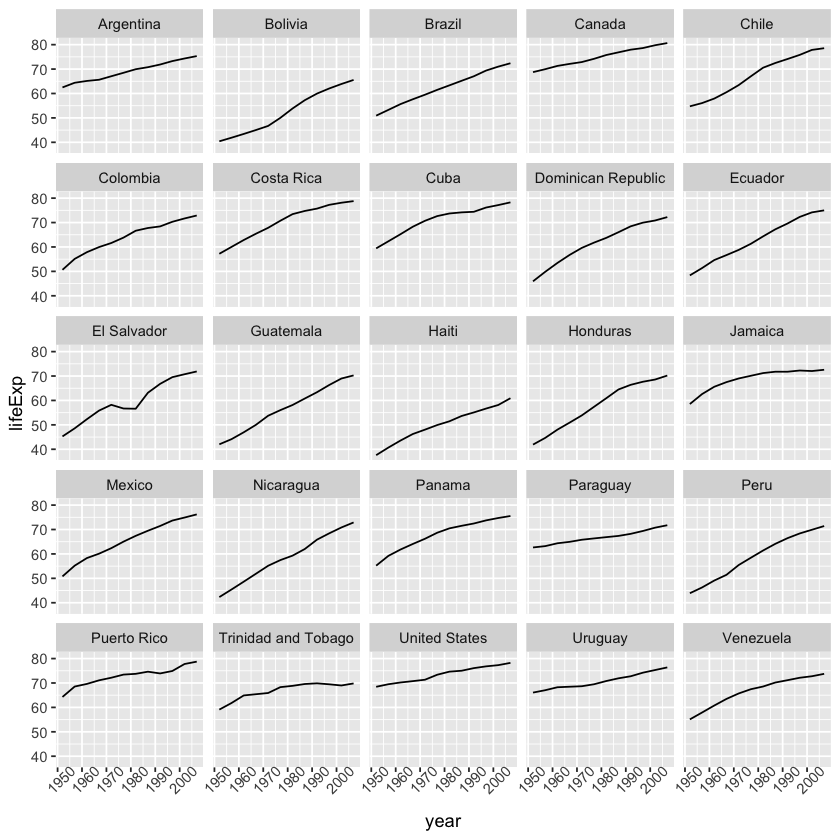

In [29]:
# INSERT CODE HERE

twentyfive <- gapminder 
twentyfive %>% filter(continent =="Americas")-> twentyfive
ggplot(data = twentyfive, mapping = aes(x=year, y=lifeExp)) + geom_line() + facet_wrap(~ country) + theme(axis.text.x = element_text(angle = 45, vjust = 1,))

 


Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

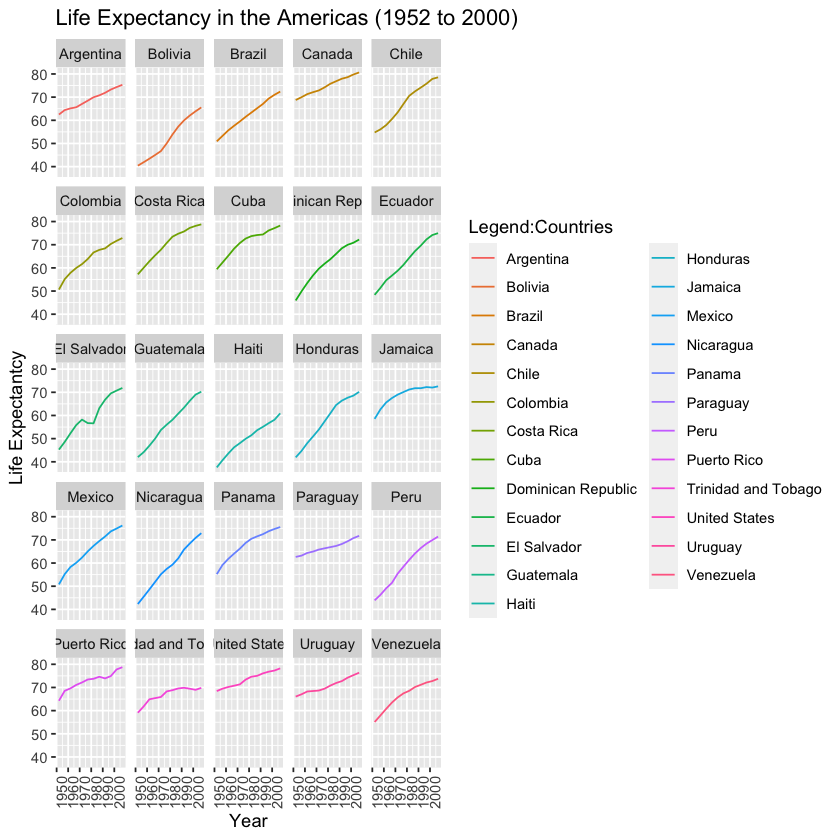

In [31]:
# INSERT CODE HERE


ggplot(data = twentyfive, mapping = aes(x=year, y=lifeExp, group=country, color=country)) +
  geom_line() + facet_wrap(~ country) +
  labs(x="Year", y="Life Expectantcy", color="Legend:Countries") +
  ggtitle("Life Expectancy in the Americas (1952 to 2000)")+
  theme(axis.text.x = element_text(angle = 90, vjust = 1,))



Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

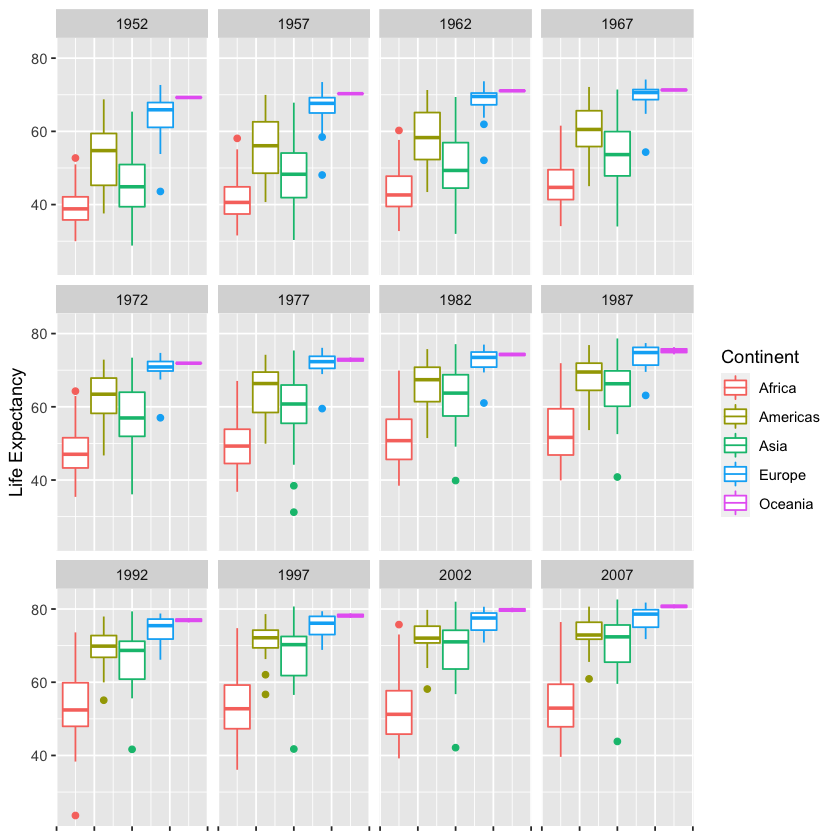

In [28]:
# INSERT CODE HERE

ggplot(gapminder, mapping = aes(y = lifeExp, color = continent)) +
geom_boxplot() + 
facet_wrap(vars(year)) +
labs(y= "Life Expectancy",
     color = "Continent") +
theme(axis.title.x = element_blank(), 
      axis.text.x = element_blank())
     

That's all for Homework 3! When you are finished, save the notebook as Homework3.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas. 

**DUE:** 5pm EST, Feb 24, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*